# Adding Signals

In [122]:
import sys
sys.path.append("..")
import random

In [2]:
from scipy.io import wavfile
import scipy.signal as sps 
import wave
import numpy as np
import soundfile
from feature_generation import extract_spectrogram
import matplotlib.pyplot as plt
import specdisplay

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/

# Merging two files!

In [541]:
def get_random_section_of_x_length(overlay_data, size):
    starting_points = (overlay_data.shape[0]-size)
    start = random.choice(range(0,starting_points+1))
    subset = overlay_data[start:start+size]
    return subset

In [564]:
filename="/home/romulo/Downloads/resampled_169659_shower.wav"

In [565]:
background_noise, bl_sample_rate = soundfile.read(filename)

In [566]:
fall_sound_file = "../samples/randy_sample_id_1550429490.149165.wav"
fall_sound, fall_sample_rate = soundfile.read(fall_sound_file)

In [567]:
fall_sample_rate == bl_sample_rate

True

In [568]:
np.squeeze(fall_sound[:,:1]).shape

(63944,)

In [569]:
background_noise

array([-0.01185691, -0.00888334, -0.00822148, ..., -0.01313768,
       -0.01195444, -0.01030697])

In [570]:
overlay = get_random_section_of_x_length(background_noise,fall_sound.shape[0])

In [571]:
import scipy

In [572]:
max_fall = max(np.max(np.squeeze(fall_sound[:,:1])),-np.min(np.squeeze(fall_sound[:,:1])))
max_overlay = max(np.max(overlay),-np.min(overlay))
scale_factor = (max_fall*0.2)/ max_overlay
scale_factor

0.12834883222994037

In [573]:
#multichannel
#c = scipy.vstack((np.squeeze(fall_sound[:,:1]),0.1*background_noise[:fall_sound.shape[0]]))
#add
c = np.add(np.squeeze(fall_sound[:,:1]),scale_factor*overlay)
#avg
#c = np.add(np.squeeze(fall_sound[:,:1]),0.3*background_noise[:fall_sound.shape[0]])/2
#max pool
#c = np.maximum(np.squeeze(fall_sound[:,:1]),0.3*background_noise[:fall_sound.shape[0]])

In [574]:
c_filename = "/home/romulo/Downloads/combined_438197__shakespit__.wav"
wavfile.write(c_filename, fall_sample_rate, c.T)

# Combined Spectrogram!

## ENSURE COLOR SCALE AMPLITUDE OF SPEC IS PRESERVED!

PResumed problem with: def power_to_db(S, ref=1.0, amin=1e-10, top_db=80.0):

In [513]:
combined_sound, fall_sample_rate = soundfile.read(c_filename)

In [514]:
import numpy as np
import librosa

def h_extract_spectrogram(samples,sample_rate,n_mels=128,n_fft=2048):
    feature_set = []
    if samples.shape[1:]:
        channels = samples.shape[1:][0]
    else:
        channels = 1
        samples = np.expand_dims(samples, axis=1)
    for i in range(channels):
        sample_channel_x = samples[:,i]
        mel_spectrogram = librosa.feature.melspectrogram(y=sample_channel_x,
                                                     sr=sample_rate,
                                                     n_fft=n_fft,
                                                     n_mels = n_mels
                                                        )
        print(mel_spectrogram.shape)
        decibel_spec = librosa.logamplitude(mel_spectrogram,ref_power=np.max)
        print(decibel_spec.shape)
        feature_set.append(decibel_spec)
        #feature_set.append(mel_spectrogram)
    feature_set = np.array(feature_set)
    feature_set = np.mean(feature_set,axis=0)
    return feature_set

(128, 125)
(128, 125)


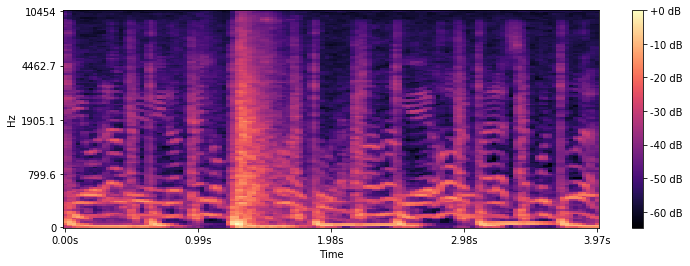

In [515]:
log_s = h_extract_spectrogram(combined_sound,fall_sample_rate)
#new plot
fig = plt.figure(figsize=(12,4))
ax = plt.Axes(fig, [0., 0., 1., 1.])
#ax.set_axis_off()
#fig.add_axes(ax)
#getting spectrogram
specdisplay.specshow(log_s, sr=fall_sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.show()

(128, 125)
(128, 125)
(128, 125)
(128, 125)
(128, 125)
(128, 125)
(128, 125)
(128, 125)


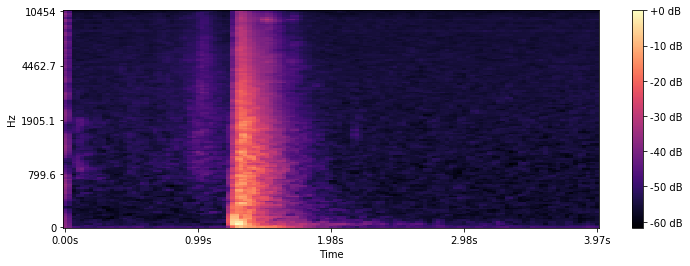

In [491]:
log_s = h_extract_spectrogram(fall_sound,fall_sample_rate)
#new plot
fig = plt.figure(figsize=(12,4))
ax = plt.Axes(fig, [0., 0., 1., 1.])
#ax.set_axis_off()
#fig.add_axes(ax)
#getting spectrogram
specdisplay.specshow(log_s, sr=fall_sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.show()

(128, 125)
(128, 125)


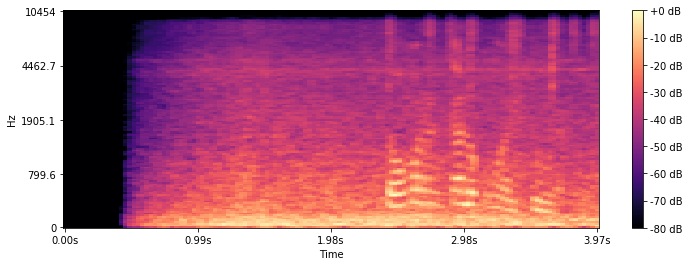

In [493]:
log_s = h_extract_spectrogram(0.9*background_noise[:fall_sound.shape[0]],fall_sample_rate)
#new plot
fig = plt.figure(figsize=(12,4))
ax = plt.Axes(fig, [0., 0., 1., 1.])
#ax.set_axis_off()
#fig.add_axes(ax)
#getting spectrogram
specdisplay.specshow(log_s, sr=fall_sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.show()